<a href="https://colab.research.google.com/github/pardo0124/Desigualdad/blob/main/Prueba_Im%C3%A1genes_Davivienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Profesional III Departamento de Datos no Estructurados  </h1>


<p style=»text-align: justify;»>
El Departamento de Analítica No estructurada busca profesionales con fuertes capacidades técnicas y sobretodo una fuerte capacidad analítica. Por consiguiente esta prueba intenta poner a prueba la forma en la que plantea y soluciona problmeas. Es importante que presente el código que usa para resolver el problema con el único motivo de medir sus capacidades.

Se recomienda que sea ordenado en su código y siga los lineamientos establecidos, aún así la prueba tiene un grado de flexibilidad. Se evaluará el orden y la creatividad a la hora de presentar la información. 
</p>


**Nota** <br>
Tenga en cuneta que éste ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habiliadades para el cargo


#### **Objetivo**
El objetivo de esta prueba es lograr un filtro que discrimine automáticamente un tipo de documento sin información relevante: páginas en blanco. Se busca que este filtro reciba como entrada una carpeta con imágenes de documentos diversos y produzca como salida dos carpetas, una con imágenes de páginas en blanco y otra con imágenes de páginas con contenido.

Páginas con solo el membrete del documento se consideran páginas en blanco, así como las que, al momento de ser escaneadas, alcanzan a reflejar contenido ininteligible del reverso de la página.


1.Importe las imágenes
En la carpeta adjunta se encontrará con documentos tanto en blanco como con contenido. Su objetivo es generar un modelo que clasifique los elementos en "Con Contenido" y "Sin Contenido". Para eso puede utilizar reglas o modelos especificos.

In [2]:
from google.colab import files
uploaded=files.upload()


Saving Datasets.zip to Datasets.zip


In [3]:
!pwd

/content


In [4]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded["Datasets.zip"]),"r")
data.extractall()

In [77]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

ruta_blanco="/content/Datasets/Blanco"
blanco=[]
img_size=150

for img in os.listdir(ruta_blanco):
  img=cv2.imread(os.path.join(ruta_blanco,img))
  #img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_resize=cv2.resize(img,(img_size,img_size))
  blanco.append(img_resize)
print(len(blanco))


147


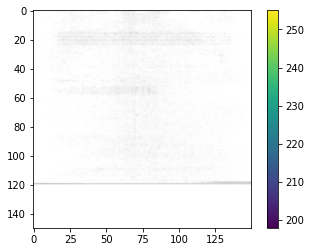

In [78]:
plt.figure()
plt.imshow(np.squeeze(blanco[1]))
plt.colorbar()
plt.grid(False)
plt.show()

In [79]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

ruta_docs="/content/Datasets/Documentos"
docs=[]
img_size=150

for img in os.listdir(ruta_docs):
  img=cv2.imread(os.path.join(ruta_docs,img))
  #img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_resize=cv2.resize(img,(img_size,img_size))
  docs.append(img_resize)
print(len(docs))


100


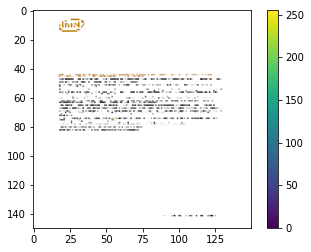

In [80]:
plt.figure()
plt.imshow(np.squeeze(docs[1]))
plt.colorbar()
plt.grid(False)
plt.show()

In [81]:
images=np.concatenate([blanco, docs])
print(len(images))
Images=np.array(images)
print(Images.shape)

247
(247, 150, 150, 3)


In [158]:
print(len(blanco))
print(len(docs))

147
100


2. Estructure la información
Debido a que las imagenes son archivos separados lo primero que debe hacer es importarlas (recuerde que una imagen es esencialmente un arreglo de vectores), puede esturcturarlas a su gusto y marcar de ser necesario aquellas que va usar como test de pruebas.

In [82]:
etiquetas_blanco=np.repeat(0,147)
print(len(etiquetas_blanco))
print(etiquetas_blanco)


147
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [83]:
etiquetas_docs=np.repeat(1,100)
print(len(etiquetas_docs))
print(etiquetas_docs)


100
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [84]:
class_names=['Blanco','Documento']

In [85]:
labels=np.concatenate([etiquetas_blanco,etiquetas_docs])
print(len(labels))
print(labels)
Labels=np.array(labels)
print(Labels.shape)

247
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(247,)


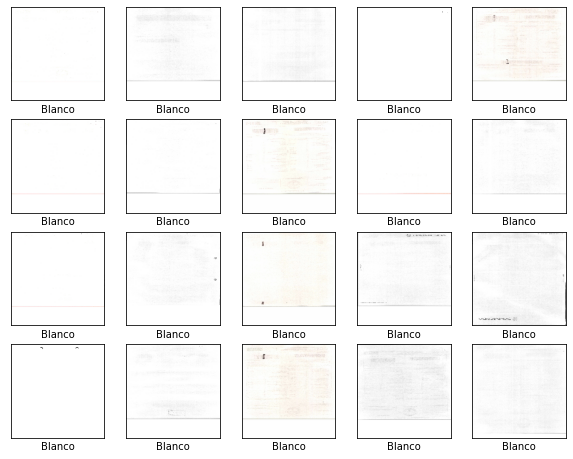

In [86]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Images[i])
  cmap=plt.cm.binary
  plt.xlabel(class_names[Labels[i]])
plt.show()


3. Describa su Estrategia de Análisis
Tiene libertad en la metodología para la clasificación. Aún así debe describir brevemente como realizará el análisis. Por ejemplo, si usará un modelo en donde requiera clasificar una cantidad pequeña de la data mencionelo o si planea condicionar la clasifiaciónes a reglas indique que reglas usará. Además si usa herramientas externas describalas y explique.

In [87]:
# TensorFlow and tf.keras
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [97]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(150,150,3)),
    keras.layers.Dense(200, activation='relu'),

    keras.layers.Dense(6, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images,Labels,epochs=30)
trained=model.fit(Images,Labels,epochs=30)

Epoch 1/30
8/8 [==============================] - 0s 6ms/step - loss: 16026.0391 - accuracy: 0.4656
Epoch 2/30
8/8 [==============================] - 0s 6ms/step - loss: 22712.7402 - accuracy: 0.5223
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 5032.2632 - accuracy: 0.5425
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 8750.4414 - accuracy: 0.5425
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 9708.2412 - accuracy: 0.5020
Epoch 6/30
8/8 [==============================] - 0s 6ms/step - loss: 10017.9932 - accuracy: 0.5385
Epoch 7/30
8/8 [==============================] - 0s 5ms/step - loss: 5096.7827 - accuracy: 0.5992
Epoch 8/30
8/8 [==============================] - 0s 6ms/step - loss: 2682.0308 - accuracy: 0.6397
Epoch 9/30
8/8 [==============================] - 0s 5ms/step - loss: 2805.1855 - accuracy: 0.5142
Epoch 10/30
8/8 [==============================] - 0s 7ms/step - loss: 4564.4321 - accuracy: 0.5709
Epoch 

4. Interpretación de Reusultados
Al final tiene que presentar la información en una matriz que muestre la calidad de su clasificación y evaluarla con la medida que guste.



In [124]:
img=Images[148]
print(img.shape)
img=(np.expand_dims(img,0))
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


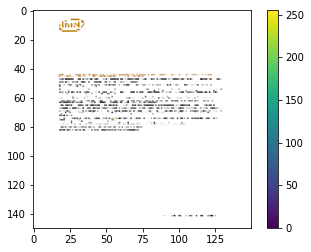

In [99]:
plt.figure()
plt.imshow(Images[148])
plt.colorbar()
plt.grid(False)
plt.show()

In [125]:
predictions_single=model.predict(img)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])

[[0. 1. 0. 0. 0. 0.]]
1.0
1
Documento


In [150]:
predictions=[]
for img in Images:
 img=(np.expand_dims(img,0))
 pred=np.argmax(model.predict(img))
 predictions.append(pred)
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [154]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(Labels,predictions, normalize='pred')
result



array([[0.96710526, 0.        ],
       [0.03289474, 1.        ]])

In [161]:
0.96710526/(0.96710526+0.03289474)

0.96710526